In [3]:
# import libraries
import json
import statsmodels.stats.multitest as smm
import scipy.stats as stats
import glob

In [6]:
configfiles = glob.glob('/home/doren/Desktop/CCN-ML/code/0_700/*/*.json')
configfiles

['/home/doren/Desktop/CCN-ML/code/0_700/E100w50s/accuracy_results.json',
 '/home/doren/Desktop/CCN-ML/code/0_700/E50w50s/accuracy_results.json',
 '/home/doren/Desktop/CCN-ML/code/0_700/E50w25s/accuracy_results.json',
 '/home/doren/Desktop/CCN-ML/code/0_700/E100w100s/accuracy_results.json',
 '/home/doren/Desktop/CCN-ML/code/0_700/E20w20s/accuracy_results.json',
 '/home/doren/Desktop/CCN-ML/code/0_700/E40w20s/accuracy_results.json',
 '/home/doren/Desktop/CCN-ML/code/0_700/E25w25s/accuracy_results.json',
 '/home/doren/Desktop/CCN-ML/code/0_700/E100w25s/accuracy_results.json']

In [7]:
for x in configfiles:
    with open(x, 'r') as f:
        accuracies = json.load(f)
    accuracies.keys()
    avg_accuracies = accuracies.pop('avg_all')
    accuracies.keys()
    n_windows = len(list(accuracies.values())[0])
    print(n_windows)
    accuracies_per_window = [ [ list(subject.values())[i] for subject in accuracies.values() ] for i in range(0, n_windows)]
    accuracies_per_window[15]
    stats.ttest_1samp(accuracies_per_window, 0.33333)
    pval_raw = []
    for window_acc in accuracies_per_window:
        pval_raw.append(stats.ttest_1samp(window_acc, 0.33333)[-1])
    #pval_raw

    rej_relax, pval_cor_relax   = smm.multipletests(pval_raw, method='b')[:2]
    rej_strict, pval_cor_strict = smm.multipletests(pval_raw, method='b', alpha=0.01)[:2]
    sig_strict = [eval(list(list(accuracies.values())[0].keys())[i]) for i, isRej in enumerate(rej_strict) if isRej]
    sig_relax = [eval(list(list(accuracies.values())[0].keys())[i]) for i, isRej in enumerate(rej_relax) if isRej]
    import matplotlib.pyplot as plt
    time_ranges = [ eval(w)[0] for w in list(accuracies.values())[0].keys() ] 
    avg_accuracies

13


IndexError: list index out of range

[0.5594636163455944,
 0.7358418710211627,
 0.7821835282937781,
 0.7053924226417939,
 0.8845002629610463,
 0.21580285871455673,
 0.0016892089362808387,
 0.0002774173555049311,
 0.00012425502006427927,
 9.10347820238772e-05,
 0.002817761491347662,
 0.00409325555775798,
 0.0737169896536679,
 0.09417396041750542,
 0.4714861233962556,
 0.7357968580983234,
 0.2358912211495206,
 0.2770384633402578,
 0.5263217516303548]

[(140, 180), (160, 200), (180, 220)]

[(120, 160), (140, 180), (160, 200), (180, 220)]

[0,
 20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360]

[(120, 160), (140, 180), (160, 200), (180, 220)]

{'(0, 40)': 0.32272876703769976,
 '(20, 60)': 0.3280853027552183,
 '(40, 80)': 0.3288965380254459,
 '(60, 100)': 0.3274458048469492,
 '(80, 120)': 0.33652635460857777,
 '(100, 140)': 0.3735202700141434,
 '(120, 160)': 0.5400089170665106,
 '(140, 180)': 0.5824357396522148,
 '(160, 200)': 0.5627628631509484,
 '(180, 220)': 0.4619333319585257,
 '(200, 240)': 0.4225734722299215,
 '(220, 260)': 0.41585401322881865,
 '(240, 280)': 0.3724196158416786,
 '(260, 300)': 0.3759683076994644,
 '(280, 320)': 0.3415900220542822,
 '(300, 340)': 0.34052894965743336,
 '(320, 360)': 0.36459613682493314,
 '(340, 380)': 0.35753927979649336,
 '(360, 400)': 0.3263272216564155}

In [64]:

sig_re_vals = [avg_accuracies[str(key)] for key in sig_relax]
sig_re_x = [wind[0]*2 for wind in sig_relax]
sig_st_vals = [avg_accuracies[str(key)] for key in sig_strict]
sig_st_x = [wind[0]*2 for wind in sig_strict]



In [66]:
sig_re_x

[240, 280, 320, 360]

<Figure size 432x288 with 0 Axes>

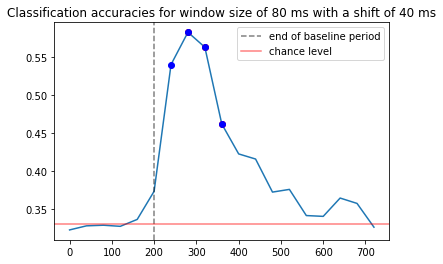

In [63]:
# mark = [vals.index(i) for i in roots]
# print(mark)
# plt.plot(vals,poly,markevery=mark, ls="", marker="o", label="points")

plt.clf()

fig, ax = plt.subplots()

time_ranges_ms = [ tr*2 for tr in time_ranges]
ax.plot(time_ranges_ms, list(avg_accuracies.values()))
ax.plot(sig_st_x,sig_st_vals,
        linestyle='none', color='r', marker='o')
ax.plot(sig_re_x,sig_re_vals,
        linestyle='none', color='b', marker='o')
ax.axvline(x=200, color='black', alpha=0.5, linestyle='--', label='end of baseline period')
ax.axhline(y=0.33, color='red', alpha=0.5, label='chance level')
ax.legend(loc='upper right')

ax.set_title('Classification accuracies for window size of 80 ms with a shift of 40 ms')
# for win in sig_relax:
#     plt.axvspan(win[0], win[1], facecolor='blue', alpha=0.15)
# 
# for win in sig_strict:
#     plt.axvspan(win[0], win[1], facecolor='red', alpha=0.3)

fig.savefig("/home/sena/Desktop/"+ 'avg_accuracy.png', bbox_inches='tight')
plt.show()
